<h1 align="center">NLP-Final Project-Amazon Reviews</h1>

### Ön Bilgi

**Problem Açıklaması:** Amazon İncelemelerini NLP Kullanarak Müşteri Derecelendirmelerine Göre Sınıflandırma
Bu bölümde, projenin temel amacı açıklanıyor. Problemin özeti, müşteri derecelendirmelerine dayalı olarak Amazon incelemelerini sınıflandırmaktır. Burada amaç, inceleme metninin anlamına dayalı olarak en uygun derecelendirmeyi atayacak bir sınıflandırıcı oluşturmaktır. Yani, inceleme metninin içeriğini anlayan bir sınıflandırıcı geliştirmek hedeflenmektedir.

**Etki:**
Müşteri incelemeleri ürünlere objektif geri bildirim sağlar ve bu nedenle tüketiciler için önemlidir. Bu derecelendirmeler genellikle sayısal bir derecelendirme veya yıldız sayısı olarak özetlenir. Ancak, gerçek metin içeriğinde sayılardan daha fazla değer bulunmaktadır. Bazen verilen derecelendirme ürün deneyimini tam olarak iletemeyebilir - geri bildirimin özü aslında metin içeriğinde bulunur. Bu nedenle amaç, bir inceleme parçasının özünü anlayacak ve metin anlamına dayalı olarak en uygun derecelendirmeyi atayacak bir sınıflandırıcı oluşturmaktır.

**Arkaplan:**
Amazon'daki ürün derecelendirmeleri, her müşterinin tüm incelemelerinden toplandığından, her bir bireysel derecelendirme aslında bir yıldızdan beş yıldıza kadar değişen bir tamsayıdır. Bu, tahminlerimizi toplam beş olasılığa sahip ayrık sınıflara indirir. Bu nedenle, temel tahminci olarak gerçek inceleme metnini kullanan gözetimli çok sınıflı bir sınıflandırıcıya sahip olacağız.
Bu çalışma, Doğal Dil İşleme (NLP) alanının bir keşfidir. Bir metin parçasının verilen yıldız derecesini tahmin etme amacı, kelime gömme, konu modellemesi ve boyut indirgeme gibi farklı NLP konularını içerecektir. Buradan hareketle, son bir veri çerçevesine ulaşacağız ve sınıflandırıcımız için en iyi yaklaşımı (en doğru tahminci) bulmak için farklı makine öğrenimi tekniklerini kullanacağız.

**Veri Kümeleri:**
Amazon veri seti, Mayıs 1996'dan Temmuz 2014'e kadar olan tüm listelenen Elektronik ürünlerinin müşteri incelemelerini içerir. Toplamda 1.689.188 inceleme bulunmaktadır ve bunlar 63.001 benzersiz ürün üzerinde 192.403 müşteri tarafından yapılmıştır. Veri sözlüğü aşağıdaki gibidir:

**asin:** İncelenen ürünün benzersiz kimliği, dize

**helpful:** Yardımcı olan kullanıcıların sayısı ve incelemeye oy veren toplam kullanıcı sayısı (yardımcı olmayan oylar dahil), liste

**overall:** İnceleyenin ürüne verdiği puan, int64

**reviewText:** İnceleme metni, dize

**reviewerID:** İncelemeyi yapan kişinin benzersiz kimliği, dize

**reviewerName:** İncelemeyi yapan kişinin belirtilen adı, dize

**summary:** İncelemenin başlık özeti, dize

**unixReviewTime:** İncelemenin ne zaman gönderildiğinin Unix zamanı, dize
Bu açıklamalar, NLP tabanlı bir proje bağlamında yapılan çalışmanın genel anlayışını ve amaçlarını özetlemektedir.

<img src="amazon_reviews.png">

### Veri Düzenleme
Bu bölümde, projenin veri düzenleme ve işleme aşamalarını anlatmaktadır.
Öncelikle, gereksiz uyarıları kapatmak için "warnings" modülü kullanılarak uyarmalar engellenir:

In [1]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

Veri kümesi, "Electronics_5.json" adında bir dosyadan okunmaya çalışılır. Eğer bu dosya mevcutsa, veri çerçevesi ("df") bu dosyadan okunur. Aksi takdirde, veri çerçevesi internetten indirilen bir JSON dosyasından yüklenir:

In [2]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head(10))

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


Belirlenen adresten çekilen veriler "csv" dosyasına kaydedilir:

In [3]:
df.to_csv("amazon.csv")

Kaydedilen veri okunur:

In [4]:
df=pd.read_csv("amazon.csv")

Merkezi Limit Teoremi (Central Limit Theorem), istatistikte önemli bir kavramdır ve birçok rastgele değişkenin toplamının veya ortalamasının, bağımsız ve aynı dağılıma sahip rastgele değişkenlerin örneklemlerinin ortalamasına yakınsadığını belirtir. Kısacası, büyük bir örneklemin ortalaması normal dağılıma daha yakın olacaktır.

Merkezi Limit Teoremi, bir popülasyonun dağılım şeklinin ne olursa olsun, yeterince büyük bir örneklem alındığında, örneklemin ortalamasının yaklaşık olarak normal dağılıma sahip olduğunu ifade eder. Bu, istatistiksel analizde birçok kez kullanılan ve sonuçların genellenmesine yardımcı olan önemli bir teorem olarak kabul edilir.

"CLT (Central Limit Theoerem)'e göre veri milyonlara ulaştığından sadece 400.000 i ile çalışmak istatiksel olarak yeterli olacak:

In [5]:
df=df.sample(400000)

Bu kod, Google Colab (Colaboratory) ortamında kullanıldığında, belirtilen dosyanın indirilmesini sağlar. files.download() fonksiyonu, Colab ortamında çalışırken oluşturulan veya işlenen bir dosyanın kullanıcıya indirilmesini sağlar.

In [6]:
from google.colab import files
files.download("amazon.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Veri setinin bellek kullanımı ve sütun türleri "info()" fonksiyonuyla görüntülenir:

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 708683 to 602962
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      400000 non-null  int64 
 1   reviewerID      400000 non-null  object
 2   asin            400000 non-null  object
 3   reviewerName    394098 non-null  object
 4   helpful         400000 non-null  object
 5   reviewText      399744 non-null  object
 6   overall         400000 non-null  int64 
 7   summary         399997 non-null  object
 8   unixReviewTime  400000 non-null  int64 
 9   reviewTime      400000 non-null  object
dtypes: int64(3), object(7)
memory usage: 33.6+ MB
None


In [8]:
!ls -al

total 1234540
drwxr-xr-x 1 root root       4096 Aug 18 11:47 .
drwxr-xr-x 1 root root       4096 Aug 18 11:45 ..
-rw-r--r-- 1 root root 1264147732 Aug 18 11:47 amazon.csv
drwxr-xr-x 4 root root       4096 Aug 16 13:41 .config
drwxr-xr-x 1 root root       4096 Aug 16 13:42 sample_data


In [9]:
dir

<function dir>

Unix zaman damgaları ("unixReviewTime"), daha sezgisel bir veri türü olan tarih ve saat nesnelerine dönüştürülür:

In [10]:
import datetime

condition = lambda row: datetime.datetime.fromtimestamp(row).strftime("%m-%d-%Y")
df["unixReviewTime"] = df["unixReviewTime"].apply(condition)

Gereksiz olan "reviewTime" sütunu veri çerçevesinden çıkarılır:

In [11]:
df.drop(labels="reviewTime", axis=1, inplace=True)

display(df.head())

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
708683,708683,A1I4VLCT3FGICV,B0034XRDUK,Paul R. Balash,"[0, 0]",Bought this PSU for use with mobo with on boar...,4,Works great,04-08-2013
585446,585446,A2IMOP73PUUM3P,B002CSUZSU,M. Kreg,"[0, 0]",I've had problems from the start with these ca...,1,"Poor, Cheap Construction",05-14-2012
1143169,1143169,A3JZAGBZDY2T8E,B005HPZ5MQ,Michael S.,"[0, 2]",This is such an amazing shotgun mic. At 40 fee...,5,Awesome product,06-03-2013
1635893,1635893,A3TJ735KIV1CTF,B00E4LGTVU,Adam G.,"[0, 0]",for the money they are great. bought them beca...,4,works very well.,03-02-2014
868255,868255,A21AYKD7KSHHD5,B0040JHVC2,travisjl28,"[0, 0]",I love this thing. It's actually sitting righ...,5,Great camera,09-12-2013


Veri çerçevesinde örnek bir yorum yazısı görüntülenir:

In [12]:
print(df["reviewText"].iloc[9])

I personally did not like this computer with Windows 7. Windows 8 Pro made all the difference. With Windows 8 Pro it is very easy to use and touch friendly. I like using the Stylus when I'm in desktop mode because of the precision. I wish I could turn off the touch interface when I'm working on Desktop mode and have it automatically enable when i'm on the Metro interface.This tablet would have gotten 5 stars if it wasn't because of two things1) The size of this tablet makes a little uncomfortable to hold it with one hand for long periods of time. Luckily there is  a Samsung Series 7 Slate Grip Assist Case which allows you to hold the laptop with one hand.2) Ever since upgrading to Windows 8 Pro I been having problems with the touch screen. Some times it stops working altogether and I have to use the Stylus. I discovered that It usually stops working after I put it to sleep after I had just plugged in a USB Mouse or USB Memory and also when I put it to sleep and try to wake it up in les

Son olarak, veri seti "overall" sütunundaki unique derecelendirmeleri görüntülemek için kullanılır:

In [13]:
print(df["overall"].unique())

[4 1 5 3 2]




```
# Bu, kod olarak biçimlendirilmiştir
```

Görsel olarak görmek istediğimizde:

<Axes: >

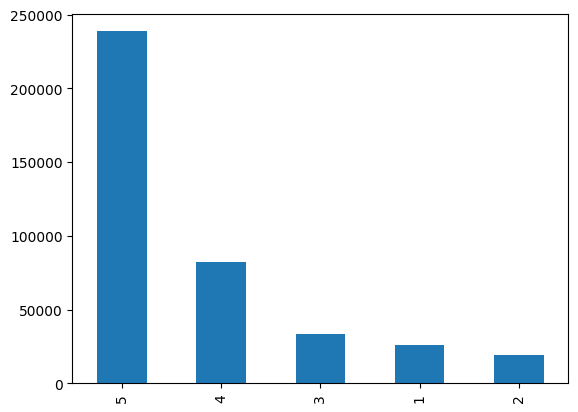

In [14]:
df.overall.value_counts().plot.bar()